<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Canny Edge Detection

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. The Canny Edge detector was developed by John F. Canny in 1986. Also known to many as the optimal detector, the Canny algorithm aims to satisfy three main criteria:
- **Low error rate:** Meaning a good detection of only existent edges.
- **Good localization:** The distance between edge pixels detected and real edge pixels have to be minimized.
- **Minimal response:** Only one detector response per edge.

### Steps
1. Filter out any noise. The Gaussian filter is used for this purpose. An example of a Gaussian kernel of size=5 that might be used is shown below:

$$
K =
\dfrac{1}{159}\begin{bmatrix}
2 & 4 & 5 & 4 & 2 \\
4 & 9 & 12 & 9 & 4 \\
5 & 12 & 15 & 12 & 5 \\
4 & 9 & 12 & 9 & 4 \\
2 & 4 & 5 & 4 & 2 \end{bmatrix}
$$

2. Find the intensity gradient of the image. For this, we follow a procedure analogous to Sobel:
    1. Apply a pair of convolution masks (in x and y directions:
$$
G_{x} = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}
\\
G_{y} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix}
$$
    2. Find the gradient strength and direction with:

$$
\begin{array}{l} G = \sqrt{ G_{x}^{2} + G_{y}^{2} } \\ \theta = \arctan\left(\dfrac{G_{y}}{G_{x}}\right) \end{array}
$$
The direction is rounded to one of four possible angles (namely 0, 45, 90 or 135)

3. Non-maximum suppression is applied. This removes pixels that are not considered to be part of an edge. Hence, only thin lines (candidate edges) will remain.

4. Hysteresis: The final step. Canny does use two thresholds (upper and lower):

    1. If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
    2. If a pixel gradient value is below the lower threshold, then it is rejected.
    3. If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.

**Canny recommended a upper:lower ratio between 2:1 and 3:1.**


**Canny edge detection process (resume):**
1. Apply gaussian filter to smooth the image in order to remove the noise.
2. Find the intensity gradients of the image.
3. Apply non-maximum suppression to get rid of spurious response to edge detection.
4. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.


The Canny algorithm contains a number of adjustable parameters, which can affect the computation time and effectiveness of the algorithm.
- **The size of the Gaussian filter:** the smoothing filter used in the first stage directly affects the results of the Canny algorithm. Smaller filters cause less blurring, and allow detection of small, sharp lines. A larger filter causes more blurring, smearing out the value of a given pixel over a larger area of the image. Larger blurring radii are more useful for detecting larger, smoother edges – for instance, the edge of a rainbow.
- **Thresholds:** the use of two thresholds with hysteresis allows more flexibility than in a single-threshold approach, but general problems of thresholding approaches still apply. A threshold set too high can miss important information. On the other hand, a threshold set too low will falsely identify irrelevant information (such as noise) as important. It is difficult to give a generic threshold that works well on all images. No tried and tested approach to this problem yet exists.

For high resolution images where you only want general edges, it is usually a good idea to apply a custom blur before applying the Canny Algorithm.
The Canny algorithm also requires a user to decide on low and high threshold values.

https://en.wikipedia.org/wiki/Canny_edge_detector

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We can applicate the Canny algorith with BGR image, but the image turns into gray scale for visualizations purpose.

In [2]:
img = cv2.imread('../DATA/sammy_face.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

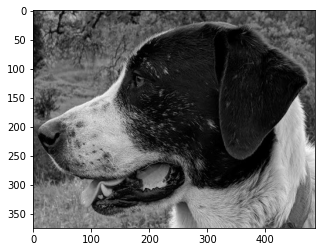

In [3]:
plt.imshow(img, cmap='gray')

## Without blurring

- **Thresholds = 127 (median of the highest posible intensity -255):**

In [4]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

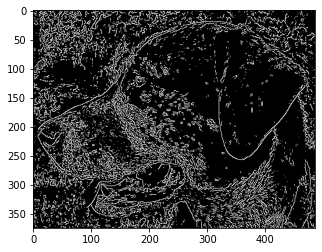

In [5]:
plt.imshow(edges, cmap='gray')

The dog (sammy) countor is visible, but also the edges in the background (noise).

- **lower=0 & upper=255:**

In [6]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)

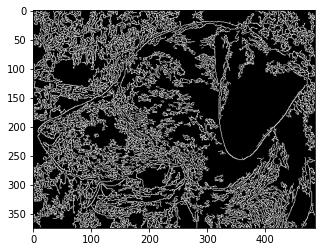

In [7]:
plt.imshow(edges, cmap='gray')

## Choosing Thresholds

A good formula after blurring for finding accurate thresholds is the following:

$$
lower = max\{0,0.7*median(I)\} \\
upper = min\{255,1.3*median(I)\}
$$

where:
- **I:** Image that will got its edges detected.
- **median(I):** The median value of all intensities in the image *I*


https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny

Calculate the median pixel value

In [8]:
med_val = np.median(img) 

Lower bound is either 0 or 70% of the median value, whicever is higher

In [9]:
lower = int(max(0, 0.7* med_val))

Upper bound is either 255 or 30% above the median value, whichever is lower

In [10]:
upper = int(min(255,1.3 * med_val))

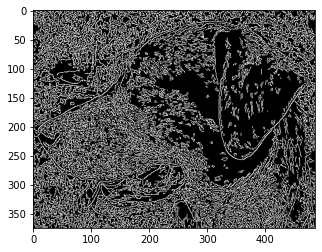

In [11]:
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)
plt.imshow(edges, cmap='gray')

Worse results are visible. However, it just works after blurring the images first, so we don't pick up minor edges.

## Bluring

Choose a kernel size of $5\times 5$:

In [12]:
blurred_img = cv2.blur(img,ksize=(5,5))

Applicate the calculated thresholds values:

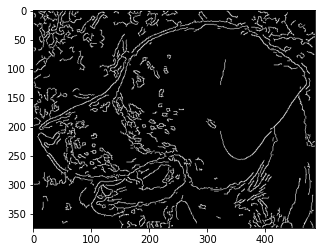

In [13]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
plt.imshow(edges, cmap='gray')

Let's take a look at threshold values in the image:

In [14]:
lower

51

In [15]:
upper

94

Let's play around with these threshold values even further!
Often you'll need to experiment in regards to your specific dataset and what your final goal is.

In this example: **The greater the upper threshold is, the better results will be gotten.**

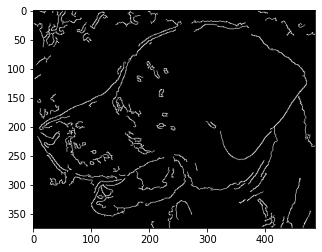

In [16]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+50)
plt.imshow(edges, cmap='gray')